# Aprendizaje no supervisado - ALGORITMO DE CLUSTERING K-MEANS (K-MEDIAS)    
## -MALL CUSTOMERS-

## Planteamiento del problema
Como propietarios de un centro comercial, deseamos conocer a los clientes que pueden converger fácilmente [clientes objetivo] para que el equipo de marketing pueda planificar una determinada estrategia en base a dicha distribución.    

A través de las tarjetas de fidelización, disponemos de algunos datos básicos sobre nuestros clientes, como el ID de cliente, la edad, el sexo, los ingresos anuales y la puntuación de gasto.   

En particular, la puntuación de gasto es algo que se asigna al cliente en función de los parámetros definidos, como el comportamiento del cliente y los datos de compra.

Por tanto, para planificar la estrategia de márketing, nos interesa analizar la distribución sobre dos datos: la citada puntuación y los ingresos anuales.

## Desarrollo de la solución

Importamos librerías necesarias

In [7]:
from sklearn.cluster import KMeans
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

Cargamos dataset sobre clientes

In [20]:
dataset = pd.read_csv('./datasets/Mall_Customers.csv')

In [21]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Localización del valor óptimo para ***K***   

Vamos a usar el WCSS para determinar el número de clusters.
WCSS es la suma de los cuadrados de las distancias de los puntos a los centroides de los clusters.
- Se usa para determinar el número óptimo de clusters.
- El método del codo es una técnica para encontrar el número óptimo de clusters.
- Se calcula el WCSS para diferentes números de clusters y se grafica.
- El punto donde se dobla la gráfica es el número óptimo de clusters.

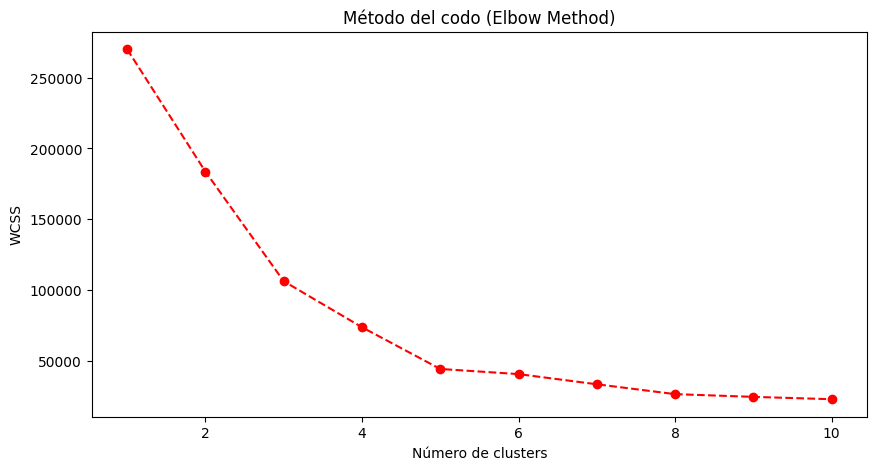

In [ ]:

wcss = [] # vector para guardar la suma de los cuadrados de las distancias.
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) # k-means++ es un algoritmo para inicializar los centroides.random_state es la semilla para el generador de números aleatorios
    kmeans.fit(dataset.iloc[:, [3,4]])                               # Entrenamos el modelo con las dos últimas columnas del dataset
    wcss.append(kmeans.inertia_)      # Añadimos el valor de inertia_ , que es el atributo que nos da la suma de los cuadrados de las distancias de cada punto al centroide más cercano.

plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='--', color='red') 
plt.title('Método del codo (Elbow Method)')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') #within cluster sum of squares - Suma de cuadrados dentro del cluster
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42) # Tomamos 5 clusters, haciendo caso a la gráfica
y_kmeans = kmeans.fit_predict(dataset.iloc[:, [3,4]])


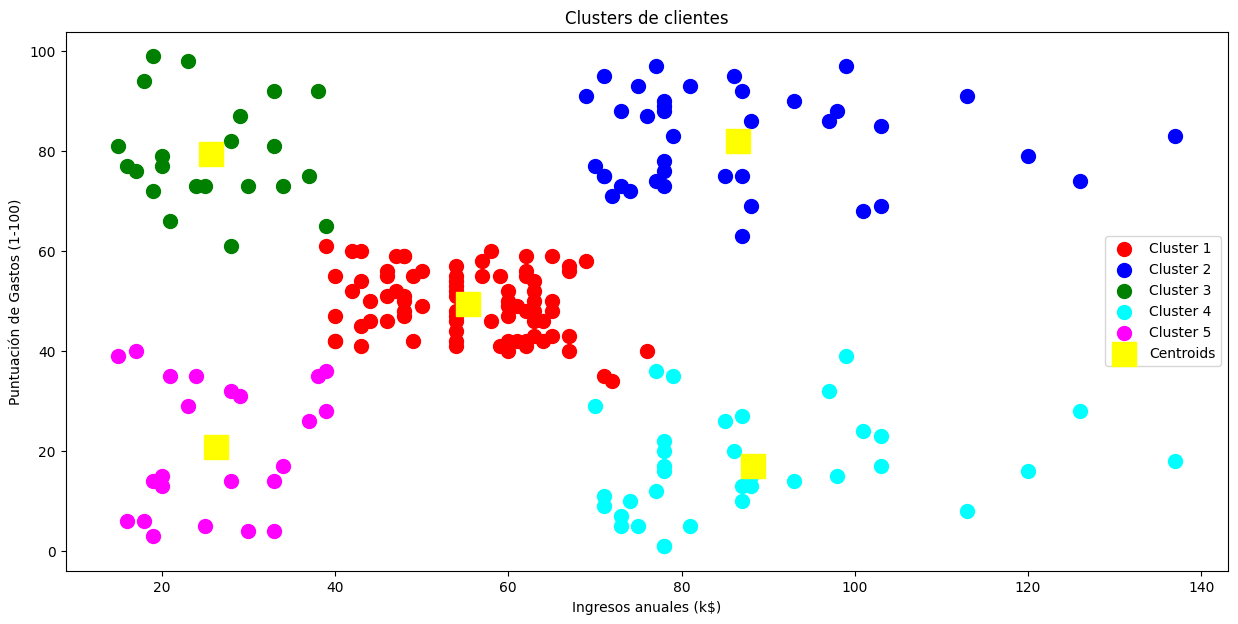

In [27]:
plt.figure(figsize=(15,7))
plt.scatter(dataset.iloc[y_kmeans == 0, 3], dataset.iloc[y_kmeans == 0, 4], s=100, c='red', label='Cluster 1')
plt.scatter(dataset.iloc[y_kmeans == 1, 3], dataset.iloc[y_kmeans == 1, 4], s=100, c='blue', label='Cluster 2')
plt.scatter(dataset.iloc[y_kmeans == 2, 3], dataset.iloc[y_kmeans == 2, 4], s=100, c='green', label='Cluster 3')
plt.scatter(dataset.iloc[y_kmeans == 3, 3], dataset.iloc[y_kmeans == 3, 4], s=100, c='cyan', label='Cluster 4')
plt.scatter(dataset.iloc[y_kmeans == 4, 3], dataset.iloc[y_kmeans == 4, 4], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker=',', c='yellow', label='Centroids')
plt.title('Clusters de clientes')
plt.xlabel('Ingresos anuales (k$)')
plt.ylabel('Puntuación de Gastos (1-100)')
plt.legend()
plt.show()